In [11]:

import pandas as pd
import numpy as np
import nltk as nltk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
df = pd.read_csv('/kaggle/input/covid19-and-its-impact-on-students/COVID-19 Survey Student Responses.csv')


/kaggle/input/covid19-and-its-impact-on-students/COVID-19 Survey Student Responses.csv


In [12]:
print(df.dtypes)
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")
missing_values = df.isnull().sum()
print(missing_values)

ID                                                                                     object
Region of residence                                                                    object
Age of Subject                                                                          int64
Time spent on Online Class                                                            float64
Rating of Online Class experience                                                      object
Medium for online class                                                                object
Time spent on self study                                                              float64
Time spent on fitness                                                                 float64
Time spent on sleep                                                                   float64
Time spent on social media                                                            float64
Prefered social media platform                              

In [13]:
categorical_columns = ["Region of residence", 'Rating of Online Class experience', 'Medium for online class']
for column in categorical_columns:
    if df[column].isnull().sum() > 0: 
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
        
numerical_columns = ['Age of Subject', 'Time spent on Online Class','Time spent on self study', 'Time spent on fitness','Time spent on sleep','Time spent on social media']

for column in numerical_columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
        

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                      0
Medium for online class                                                                0
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                        17
Time spent on TV     

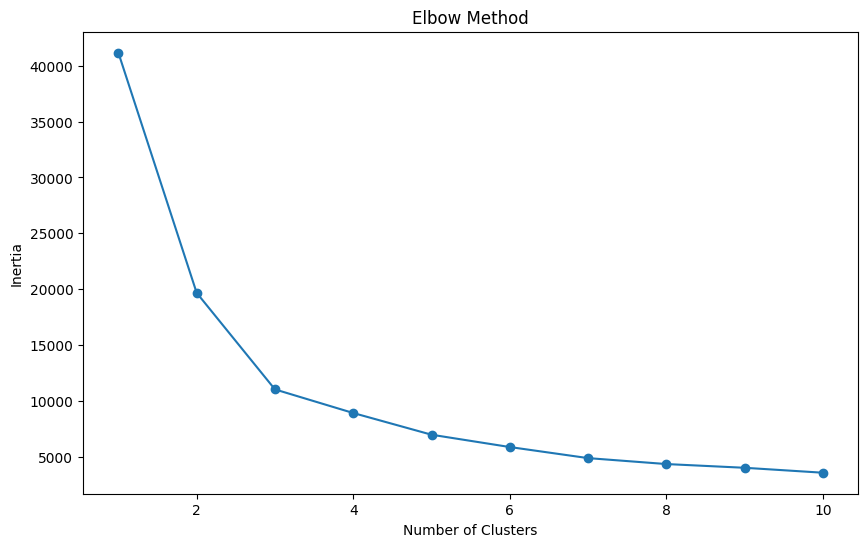

In [14]:
missing_values = df.isnull().sum()
print(missing_values)


inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df[['Age of Subject', 'Time spent on Online Class']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

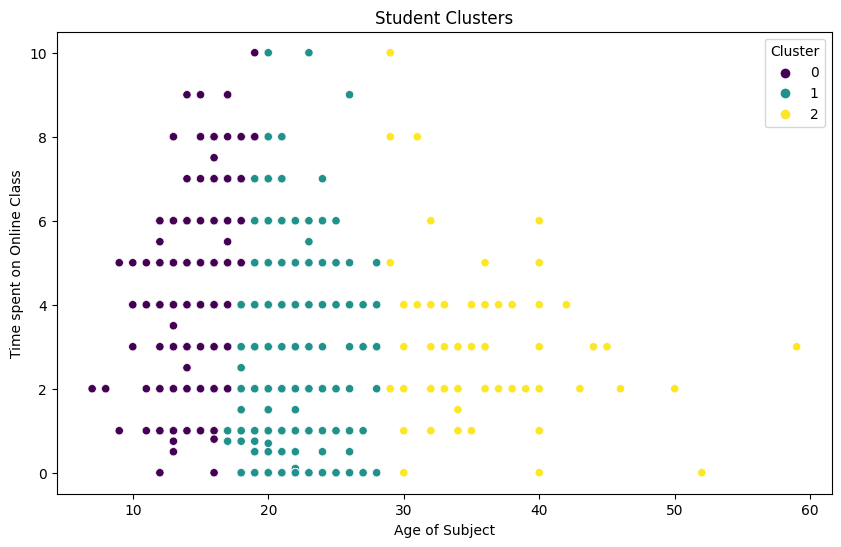

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Age of Subject', 'Time spent on Online Class']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age of Subject', y='Time spent on Online Class', hue='Cluster', palette='viridis')
plt.title('Student Clusters')
plt.show()

### Clustering:

As you can see, the clusters created are based on the ages. The most populous cluster is the cluster 1, which ranges from ages 26 to 29, and shows that they spent a median of 4 hours of online school. Cluster 2 has the largest age range, while Cluster 0 has the second biggest.

# 

In [2]:
data_filtered = df[df['Rating of Online Class experience'] != 'NA']
X = data_filtered[['Age of Subject', 'Time spent on self study', 'Time spent on fitness', 'Time spent on sleep']]
# variable encoding to transfer over a qualitative variable to a quantitaive varible.
y = data_filtered['Rating of Online Class experience'].map({'Excellent':4,'Good':3,'Average':2,'Poor':1,'Very Poor':0})

NameError: name 'df' is not defined